# Lab 8.3.3

In [2]:
library("randomForest")
library(MASS)
train = sample (1:nrow(Boston), nrow(Boston)/2)
 boston.test=Boston[-train ,"medv"]

In [3]:
set.seed(1)
bag.boston= randomForest(medv~.,data=Boston , subset=train , mtry=13,importance =TRUE)

In [4]:
print(bag.boston)


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 15.62848
                    % Var explained: 81.64


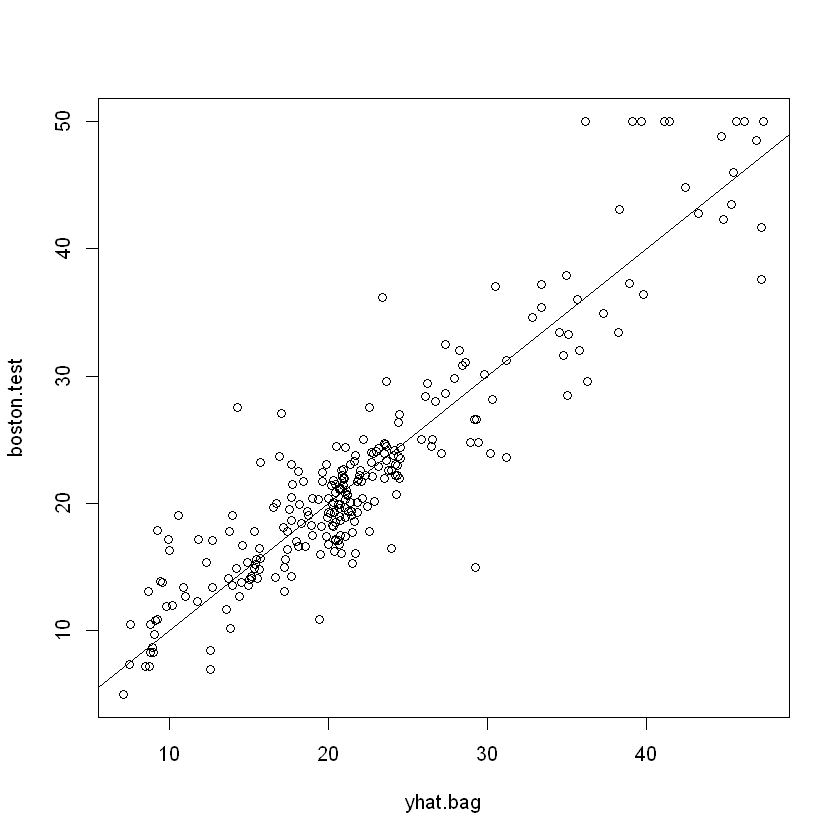

In [5]:
yhat.bag = predict (bag.boston , newdata=Boston[-train ,])
plot(yhat.bag , boston.test)
abline (0,1)

In [6]:
mean((yhat.bag -boston.test)^2)

[1] 13.36008

In [7]:
bag.boston= randomForest( medv~.,data=Boston , subset=train , mtry=13,ntree=25)
yhat.bag = predict (bag.boston , newdata=Boston[-train ,])
mean((yhat.bag -boston.test)^2)

[1] 13.50821

In [8]:
set.seed(1)
rf.boston= randomForest(medv~.,data=Boston , subset=train , mtry=6, importance =TRUE)
yhat.rf = predict(rf.boston ,newdata=Boston[- train ,])
mean((yhat.rf-boston.test)^2)

[1] 12.55047

In [9]:
importance (rf.boston)

,%IncMSE,IncNodePurity
crim,14.632563,1233.61605
zn,2.785134,34.23654
indus,9.420813,492.85445
chas,1.035081,36.45133
nox,10.848379,1236.60646
rm,37.778296,6979.18254
age,7.057641,398.38388
dis,11.446069,1034.99692
rad,5.184584,153.45960
tax,7.821295,374.24169


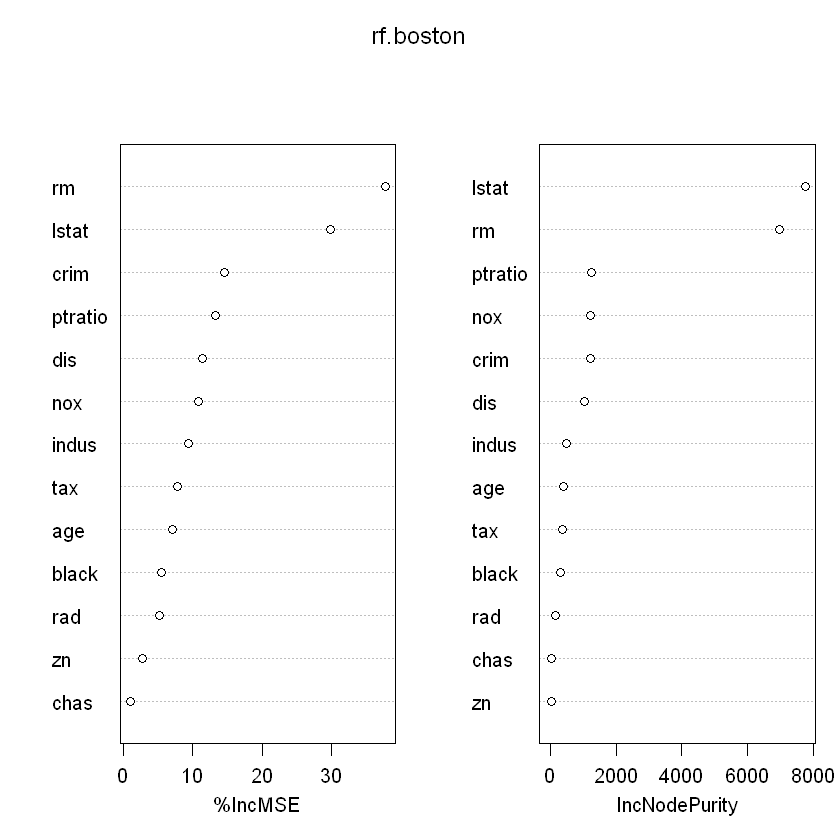

In [10]:
varImpPlot (rf.boston)

# Lab 8.3.4

In [12]:
library("gbm")
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train ,], distribution="gaussian",n.trees=5000, interaction.depth=4)

,var,rel.inf
,<chr>,<dbl>
lstat,lstat,35.83220355
rm,rm,32.74078708
crim,crim,6.81200294
dis,dis,6.24804230
nox,nox,5.29527883
age,age,3.82878797
black,black,3.21355065
ptratio,ptratio,2.85720536
tax,tax,1.59537666


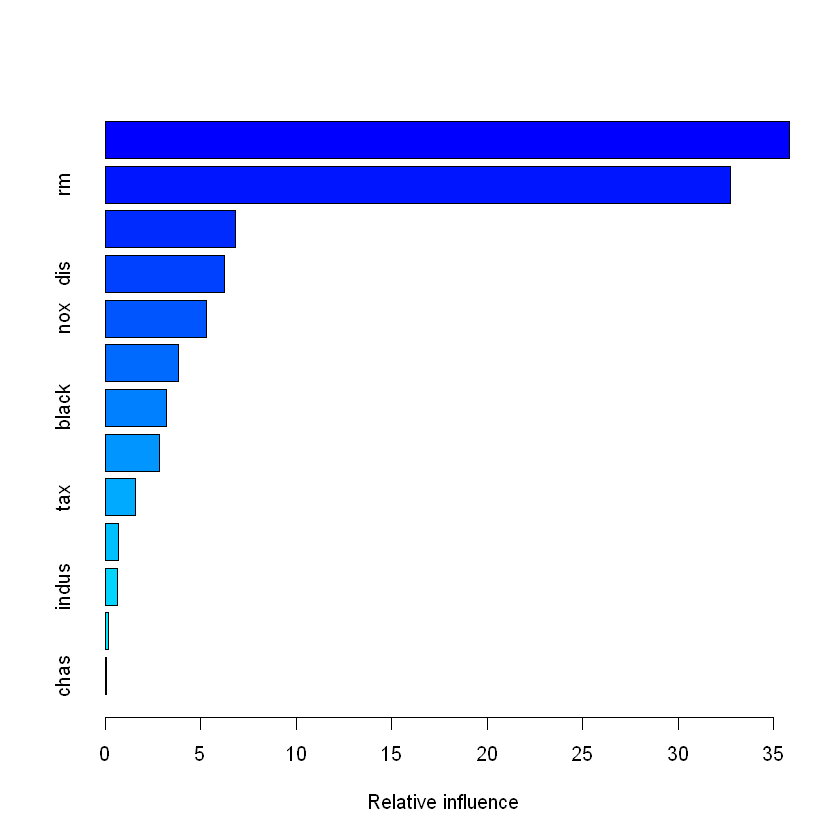

In [13]:
summary(boost.boston)

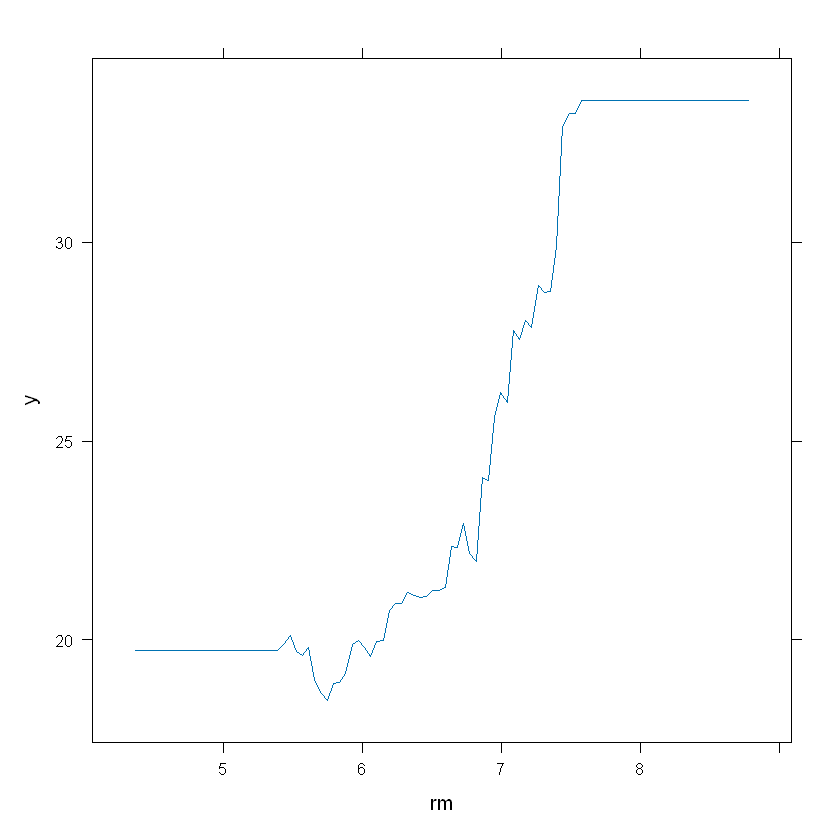

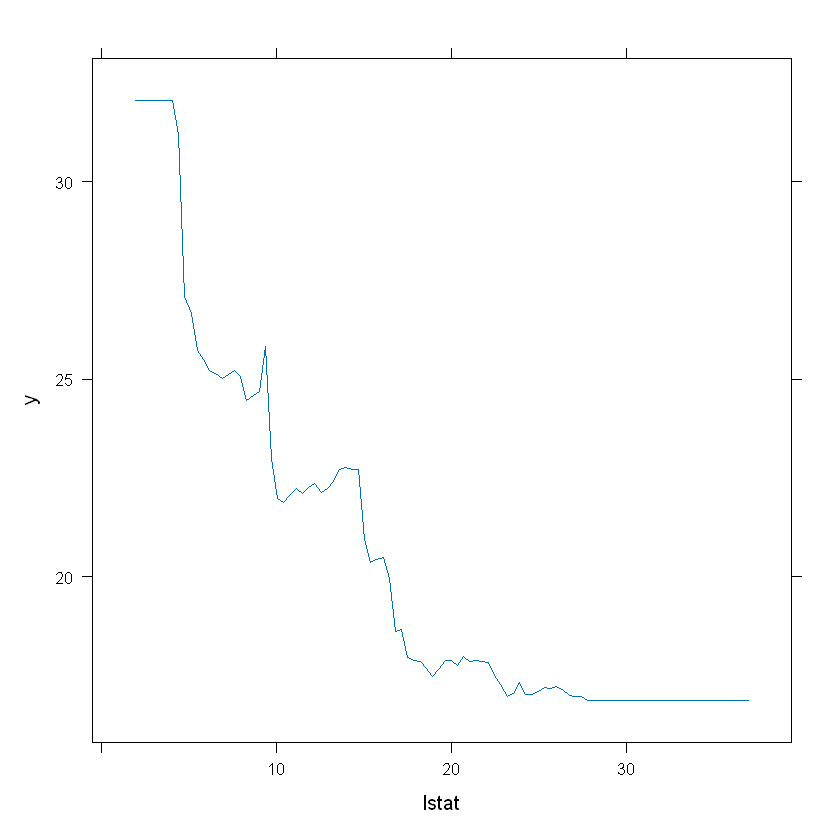

In [14]:
par(mfrow=c(1,2))
plot(boost.boston ,i="rm")
plot(boost.boston ,i="lstat")

In [15]:
yhat.boost=predict (boost.boston ,newdata =Boston[-train ,], n.trees=5000)
mean((yhat.boost - boston.test)^2)

[1] 11.57906

In [16]:
boost.boston=gbm(medv~.,data=Boston[train ,], distribution= "gaussian" ,n.trees =5000, interaction.depth =4, shrinkage =0.2, verbose=F)
yhat.boost=predict (boost.boston ,newdata =Boston[-train ,], n.trees=5000)
mean((yhat.boost - boston.test)^2)

[1] 11.67823